In [267]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [268]:
time_series= np.array([2.54, 2.5,2.45, 2.4,2.37,2.3,2.27,2.19,2.05,2])

In [269]:
len(time_series)

10

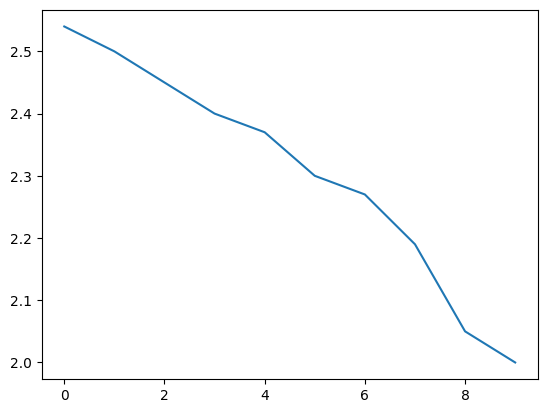

In [270]:
plt.plot(time_series)

In [ ]:
def autocorr_func(x, max_lag):
    n = len(x)
    acf = np.zeros((max_lag + 1))
    acf[0] = 1  # r(0) = 1
    for k in range(1, max_lag + 1):
            # Выборка y_i (для i = k+1..n)
            y_i = x[k:]
            # Выборка y_{i-k} (для i = k+1..n → индексы 0..n-k-1)
            y_ik = x[:n - k]
            
            # Средние значения
            y2kmin1 = np.mean(y_i)   
            y2k = np.mean(y_ik)       
            
            
            numerator = np.sum((y_i - y2kmin1) * (y_ik - y2k))
            
            # Знаменатель: произведение стандартных отклонений
            denom1 = np.sqrt(np.sum((y_i - y2kmin1) ** 2))
            denom2 = np.sqrt(np.sum((y_ik - y2k) ** 2))
            denominator = denom1 * denom2

            acf[k] = numerator / denominator

    return acf


In [272]:
autocorr = autocorr_func(time_series, int(4))

In [273]:
def box_test (autocorrel, x):
    n = len(x)
    m = len(autocorrel)
    k = np.arange(1, m+1)
    test = n* (n+2) * np.sum(np.square(autocorrel)/(n-k))

    return test

In [274]:
q_stat = box_test(autocorr, time_series)

In [275]:
q_stat

86.29864290078865

In [276]:
p_value = chi2.ppf(0.95, 5)

In [277]:
p_value

11.070497693516351

In [296]:
if q_stat > p_value :
    print('Коррелированность есть')

Коррелированность есть


In [279]:
linear_function = np.linspace(2.54, 2, 10)

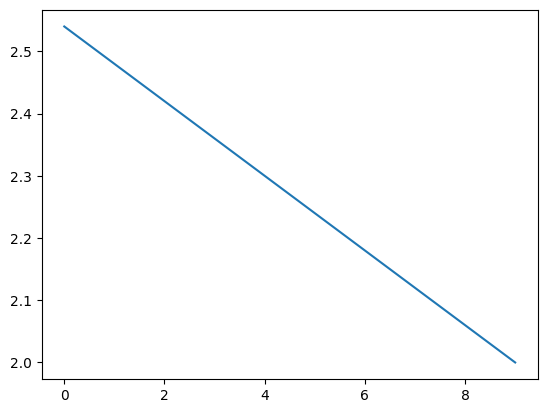

In [280]:
plt.plot(linear_function)

In [281]:
#years = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10"]

In [282]:
years = np.arange(10)

In [283]:
years = years.reshape(-1,1)

In [284]:
model = LinearRegression()

In [285]:
model.fit(years, time_series )

LinearRegression()

In [286]:
model.coef_

array([-0.05921212])

In [287]:
y_pred = model.predict(years)

In [288]:
r2 = r2_score(y_pred, time_series)

In [289]:
r2

0.9628046921570743

In [290]:
variance_error = np.var(time_series - y_pred)

In [291]:
variance_error

0.0010758787878787897

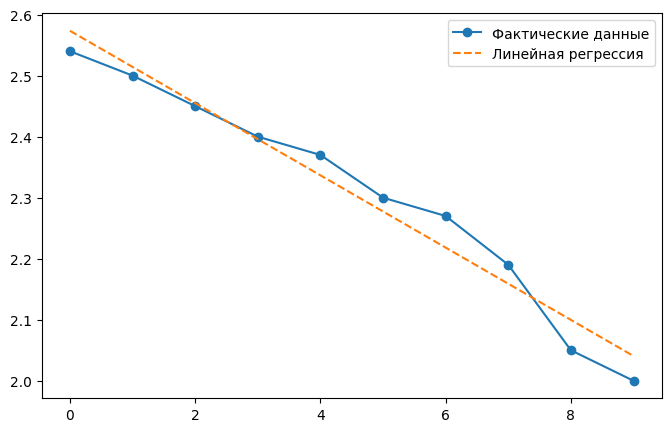

In [295]:
plt.figure(figsize=(8,5))

plt.plot(years, time_series, label='Фактические данные', marker='o')
plt.plot(years, y_pred, label='Линейная регрессия', linestyle='--')

plt.legend()

plt.show()